<a href="https://colab.research.google.com/github/autumnliaves/Intro_redes_neuronales/blob/main/Introducci%C3%B3n_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Redes Neuronales

**Liany Stella Villa Carpio /**
**Machine learning II**


## Parte Teórica

### 1. ¿Qué es una red neuronal y cuáles son sus componentes principales?

Una red neuronal es un modelo computacional inspirado en el funcionamiento del cerebro humano. Está compuesta por **neuronas artificiales** organizadas en capas: una capa de entrada, una o más capas ocultas y una capa de salida.

Componentes principales:
- **Neuronas**: unidades básicas que reciben entradas, aplican una función y generan una salida.
- **Pesos y sesgos**: parámetros ajustables que determinan la influencia de cada entrada.
- **Funciones de activación**: transforman la salida de cada neurona para introducir no linealidad.
- **Arquitectura**: la forma en que las neuronas están conectadas (una capa, multicapas, etc.)

---

### 2. ¿Qué es el backpropagation y cuál es su importancia?

El **backpropagation** es el algoritmo utilizado para entrenar redes neuronales. Calcula el **gradiente del error** con respecto a los pesos de la red, y los ajusta usando **descenso del gradiente**.

Pasos:
1. Se calcula el error de salida (diferencia entre predicción y etiqueta real).
2. Este error se propaga hacia atrás por la red, capa por capa.
3. Se actualizan los pesos para minimizar el error.

Es fundamental porque permite que la red **aprenda** de manera eficiente ajustando los pesos para mejorar sus predicciones.

---

### 3. Tres funciones de activación comunes y sus características:

- **ReLU (Rectified Linear Unit)**  
  `f(x) = max(0, x)`  
  Ventajas: rápida, evita el problema de gradientes pequeños.  
  Problema: algunas neuronas pueden "morir".

- **Sigmoide**  
  `f(x) = 1 / (1 + e^(-x))`  
  Ventajas: buena para clasificaciones binarias.  
  Problema: puede causar gradientes pequeños (vanishing gradient).

- **tanh (Tangente hiperbólica)**  
  `f(x) = (e^x - e^(-x)) / (e^x + e^(-x))`  
  Rango: -1 a 1. Mejor que sigmoide en muchos casos.


In [16]:
# Paso 1: Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

from keras.models import Sequential
from keras.layers import Dense

In [17]:
# Paso 2: Cargar el dataset
df = pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
# Paso 3: Revisión y limpieza de datos
df.info()
print("\\nValores nulos por columna:")
print(df.isnull().sum())
print("\\nDistribución de clases:")
print(df['Class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [19]:
# Paso 3: Revisión y limpieza de datos
df["V23"] = pd.to_numeric(df["V23"], errors="coerce")  # Corregir tipo de dato
df.dropna(inplace=True)  # Eliminar filas con valores nulos

print("Valores nulos después de limpieza:")
print(df.isnull().sum())
print("\nDistribución de clases actualizada:")
print(df["Class"].value_counts())


Valores nulos después de limpieza:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Distribución de clases actualizada:
Class
0    284315
1       492
Name: count, dtype: int64


<ipython-input-20-e4d4f13bd748>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='coolwarm')


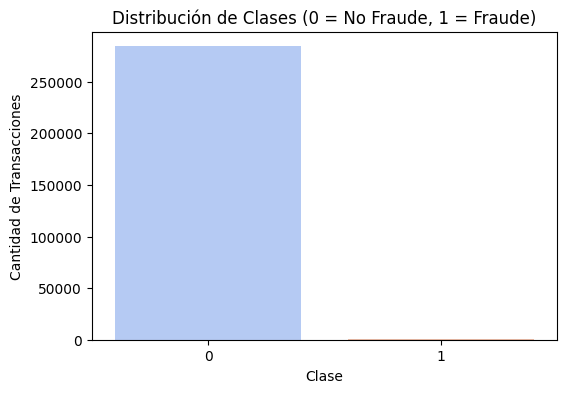

In [20]:
#Visualización de los datos: Distribución de clases

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df, palette='coolwarm')
plt.title('Distribución de Clases (0 = No Fraude, 1 = Fraude)')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Transacciones')
plt.show()



In [21]:
# Tabla de distribución de clases
distribucion = df['Class'].value_counts().rename({0.0: "No Fraude", 1.0: "Fraude"}).to_frame()
distribucion.columns = ["Cantidad de Transacciones"]
distribucion["Porcentaje (%)"] = 100 * distribucion["Cantidad de Transacciones"] / len(df)

import pandas as pd
import IPython.display as display
display.display(distribucion)


,Cantidad de Transacciones,Porcentaje (%)
Class,,
No Fraude,284315,99.827251
Fraude,492,0.172749


## Para tener en cuenta

Como se evidencia en la gráfica y la tabla anterior, el conjunto de datos está fuertemente desbalanceado: la gran mayoría de transacciones son no fraudulentas (clase 0), mientras que los fraudes (clase 1) representan una fracción muy pequeña del total (menos del 0.3%).

Este tipo de desbalance es común en contextos reales como la detección de fraude financiero. Aunque un modelo podría obtener una alta precisión simplemente prediciendo siempre la clase mayoritaria, esto no sería útil para el objetivo principal del análisis, que es identificar correctamente las transacciones fraudulentas.

Por ello, en este proyecto se tomarán medidas para mitigar este efecto. En primer lugar, se utilizarán métricas adecuadas como **recall**, **precisión**, **F1-score** y la **matriz de confusión**, que permiten evaluar el desempeño del modelo específicamente en la clase minoritaria. Además, se aplicará **ponderación de clases** durante el entrenamiento de la red neuronal, para darle mayor importancia a los ejemplos de fraude y mejorar así la capacidad del modelo de detectarlos.


<ipython-input-22-cc3d629ae1f2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlaciones.values, y=correlaciones.index, palette='coolwarm')


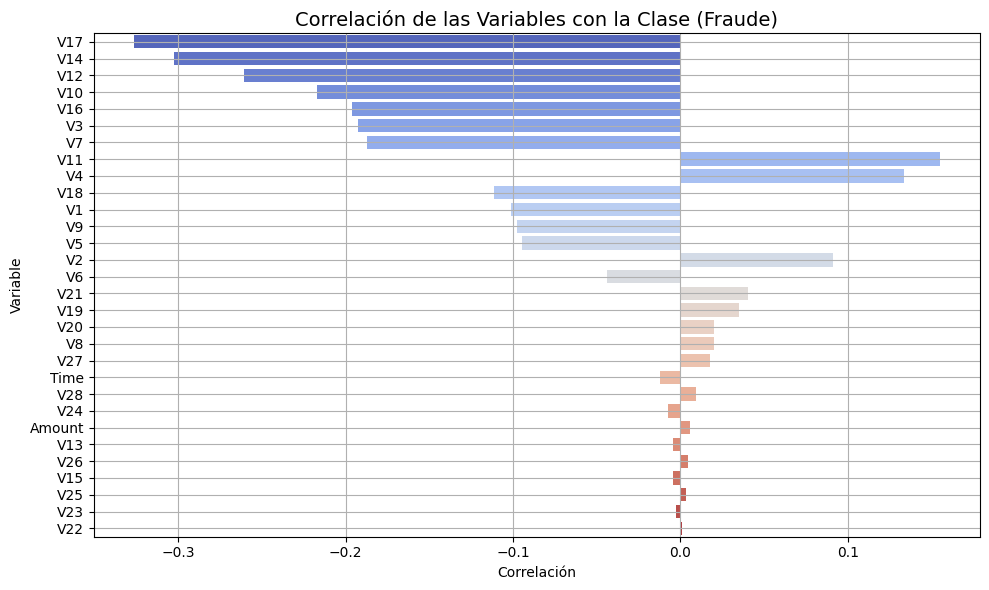

In [22]:
# Correlación de cada variable con 'Class'
correlaciones = df.corr()['Class'].drop('Class').sort_values(key=abs, ascending=False)

# Visualización tipo barplot
plt.figure(figsize=(10,6))
sns.barplot(x=correlaciones.values, y=correlaciones.index, palette='coolwarm')
plt.title('Correlación de las Variables con la Clase (Fraude)', fontsize=14)
plt.xlabel('Correlación')
plt.ylabel('Variable')
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
# Paso 4: Preprocesamiento
X = df.drop("Class", axis=1)
y = df["Class"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


print(f"Datos de entrenamiento: {X_train.shape}, Etiquetas: {y_train.shape}")
print(f"Datos de prueba: {X_test.shape}, Etiquetas: {y_test.shape}")


Datos de entrenamiento: (227845, 30), Etiquetas: (227845,)
Datos de prueba: (56962, 30), Etiquetas: (56962,)


## Creación del Modelo

A continuación, se construye un modelo de red neuronal simple utilizando Keras, diseñado para resolver un problema de **clasificación binaria**, específicamente la detección de transacciones fraudulentas. El modelo tiene la siguiente arquitectura:

- Una capa de entrada con 30 características (correspondientes a las variables del dataset, ya normalizadas)
- Dos capas ocultas:
  - Primera capa oculta con 32 neuronas y activación ReLU
  - Segunda capa oculta con 16 neuronas y activación ReLU
- Una capa de salida con 1 neurona y activación sigmoide

### Funciones de activación utilizadas:

#### 🔷 ReLU (Rectified Linear Unit)
`f(x) = max(0, x)`

Esta función se utiliza en las capas ocultas por las siguientes razones:
- Introduce **no linealidad**, lo cual permite que la red aprenda patrones complejos
- Es **computacionalmente eficiente**, ya que es fácil de calcular
- Ayuda a mitigar el problema del **desvanecimiento del gradiente**, que afecta a otras funciones como la sigmoide o tanh

#### 🔶 Sigmoide
`f(x) = 1 / (1 + e^(-x))`

Se utiliza en la capa de salida porque:
- Su salida está entre 0 y 1, lo cual es ideal para interpretar como **probabilidad de fraude**
- Su derivada es sencilla: `f'(x) = f(x) * (1 - f(x))`, lo cual facilita el proceso de retropropagación

### ⚖️ Ponderación de clases

Dado que el conjunto de datos está fuertemente desbalanceado, se emplea **ponderación de clases** durante el entrenamiento. Esto significa que se le da **más peso a la clase minoritaria (fraude)**, para que el modelo no ignore estos casos por su baja frecuencia. Esta técnica mejora la capacidad del modelo para detectar fraudes, sin necesidad de alterar artificialmente el dataset con técnicas de sobremuestreo.

Con esta arquitectura se espera lograr un modelo que no solo sea preciso, sino también **sensible a los casos de fraude**, que son los más importantes desde una perspectiva de aplicación real.

In [27]:
# Paso 5: Construcción del modelo
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Creamos un modelo simple de red neuronal
model = Sequential([
    Dense(32, input_shape=(X_train.shape[1],), activation='relu', name='capa_oculta_1'),
    Dense(16, activation='relu', name='capa_oculta_2'),
    Dense(1, activation='sigmoid', name='capa_salida')
])

# Compilamos el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Mostramos el resumen del modelo
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ capa_oculta_1 (Dense)           │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_oculta_2 (Dense)           │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_salida (Dense)             │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from sklearn.utils import class_weight
import numpy as np

# Calcular los pesos automáticamente en función de la distribución de clases
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Convertir a diccionario
class_weights_dict = dict(enumerate(class_weights))

# Verificamos los pesos calculados
print("Pesos de clase asignados:", class_weights_dict)


Pesos de clase asignados: {0: np.float64(0.5008661206149896), 1: np.float64(289.14340101522845)}


## ¿Para qué sirve `class_weight`?

El parámetro `class_weight` se utiliza para **corregir el desbalance de clases** durante el entrenamiento del modelo.

En datasets como este, donde hay muy pocos casos de fraude, el modelo puede aprender a predecir solo la clase mayoritaria (no fraude). Para evitarlo, `class_weight` le da **más peso a los errores cometidos en la clase minoritaria**, haciendo que el modelo le preste más atención a los fraudes.

Esto mejora métricas como el **recall** y el **F1-score**, que son clave en problemas de clasificación desbalanceada.

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4206 - loss: 0.4830 - val_accuracy: 0.9781 - val_loss: 0.3370
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9855 - loss: 0.2243 - val_accuracy: 0.9817 - val_loss: 0.1937
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9829 - loss: 0.2065 - val_accuracy: 0.9825 - val_loss: 0.1388
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9825 - loss: 0.1454 - val_accuracy: 0.9812 - val_loss: 0.1221
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9827 - loss: 0.1320 - val_accuracy: 0.9821 - val_loss: 0.1047
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9830 - loss: 0.0986 - val_accuracy: 0.9767 - val_loss: 0.1111
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9795 - loss: 0.1201 - val_accuracy: 0.9837 - val_loss: 0.0848
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9836 - loss: 0.1004 - val_accuracy: 0.9795 - val_loss:

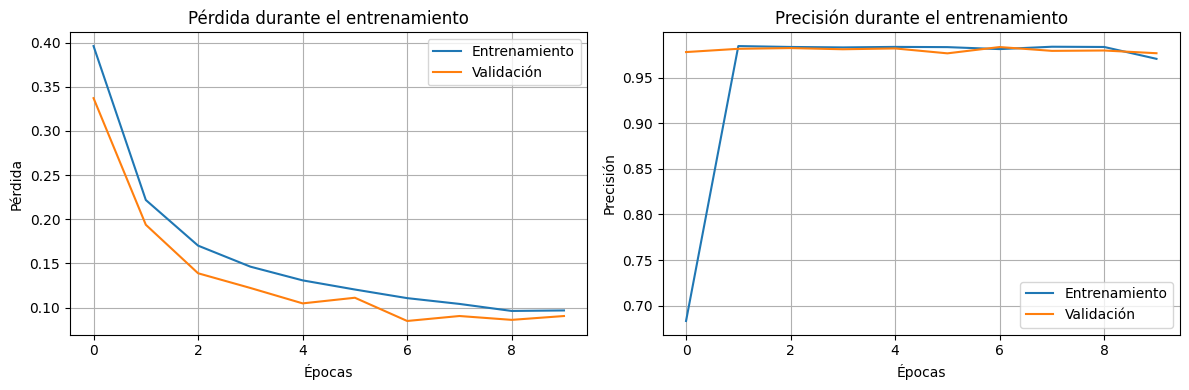

In [30]:
# Entrenamos el modelo
history = model.fit(X_train, y_train,
                    batch_size=2048,
                    epochs=10,
                    validation_split=0.2,
                    class_weight=class_weights_dict,  # muy importante por el desbalance
                    verbose=1)

# Función para visualizar el historial
def plot_training_history(history):
    import matplotlib.pyplot as plt

    # Pérdida
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Entrenamiento')
    plt.plot(history.history['val_loss'], label='Validación')
    plt.title('Pérdida durante el entrenamiento')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.grid(True)

    # Precisión
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.title('Precisión durante el entrenamiento')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Visualizamos el historial de entrenamiento
plot_training_history(history)


## Análisis del Entrenamiento del Modelo

Las gráficas muestran la evolución de la **pérdida** y la **precisión** durante el entrenamiento y la validación del modelo a lo largo de 10 épocas.

### Pérdida
En la primera gráfica, se observa una **disminución constante de la pérdida** tanto en el conjunto de entrenamiento como en el de validación. Esto indica que el modelo está aprendiendo de forma efectiva a minimizar el error y no presenta señales de sobreajuste prematuro, ya que la pérdida de validación también mejora junto con la de entrenamiento.

### Precisión
En la segunda gráfica, la **precisión aumenta rápidamente en las primeras épocas** y luego se mantiene estable alrededor del 97–98%, lo cual sugiere que el modelo logra una alta tasa de aciertos. Además, la precisión en validación sigue una trayectoria similar a la del entrenamiento, lo cual es una buena señal de **generalización del modelo**.

En conjunto, estas curvas indican un entrenamiento **estable y exitoso**, con buen rendimiento tanto en los datos vistos como no vistos (validación). Sin embargo, dado el desbalance de clases, es importante complementar este análisis con métricas más sensibles como **recall**, **F1-score** y la **matriz de confusión**, especialmente para evaluar el desempeño en la detección de fraudes.


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 836us/step


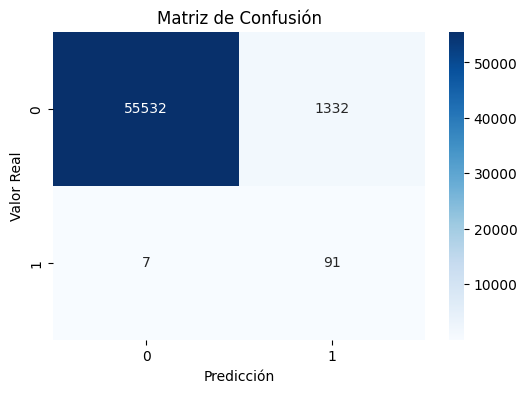

Reporte de Clasificación:

              precision    recall  f1-score   support

           0     0.9999    0.9766    0.9881     56864
           1     0.0639    0.9286    0.1197        98

    accuracy                         0.9765     56962
   macro avg     0.5319    0.9526    0.5539     56962
weighted avg     0.9983    0.9765    0.9866     56962



In [31]:
# Paso 7: Evaluación
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

# Reporte de clasificación
print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred_classes, digits=4))


El modelo presenta una alta capacidad para detectar transacciones fraudulentas, con un **recall del 92.9%** para la clase 1, lo que indica que identifica correctamente la mayoría de los fraudes reales. Sin embargo, la **precision de solo 6.3%** evidencia una alta cantidad de falsos positivos, es decir, casos normales que el modelo predice como fraude.

Esto sugiere un modelo con gran sensibilidad pero baja especificidad, lo cual puede ser aceptable en escenarios donde es preferible **detectar la mayoría de los fraudes a costa de algunas falsas alarmas**. En futuras iteraciones, se podría ajustar el **umbral de decisión** o aplicar técnicas de reducción de falsos positivos para mejorar el balance entre precision y recall.


## Conclusión

Esta actividad me permitió afianzar los conceptos fundamentales de las redes neuronales, tanto desde la teoría como en la práctica. Logré implementar una red neuronal básica para un caso real como la detección de fraudes bancarios, enfrentándome al reto del desbalance de clases y la interpretación de métricas más allá del accuracy. Esta experiencia refuerza mi comprensión del proceso de entrenamiento, la importancia del preprocesamiento y el análisis de resultados. Me siento más preparada para enfrentar modelos más complejos y aplicar estas herramientas en problemas del mundo real.
